<a href="https://colab.research.google.com/github/horaco11/terremoto/blob/master/Terremotos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Instalar e importar librerias***

In [1]:
pip install reverse_geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268064 sha256=e06de246d49598e5c9ba11e232ba17368a205198f7c834d4e14f3c85ed021d50
  Stored in directory: /root/.cache/pip/wheels/bd/e5/88/eb139b6d6a26b8022d370ab991f7a836802fed9871975ec6d9
Successfully built reverse_geocoder


In [2]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 17.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg

## ***Leer archivo .csv***

In [9]:
df_terremoto = pd.read_csv('sample_data/Global_Earthquake_Data.csv')

## ***Mostrar 5 primeras filas***

In [10]:
df_terremoto.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.0,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.8,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.9,mb,45.0,77.0,1.223,0.82,...,2023-02-27T00:21:32.040Z,NaN,earthquake,6.27,1.869,0.086,42.0,reviewed,us,us
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.6,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.5,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us


## ***Analizando cantidad de filas y columnas del dataframe***

In [ ]:
df_terremoto.shape
filas,columnas = df_terremoto.shape
print(f"La cantidad de columnas que tiene el dataset es de {columnas}\nLa cantidad de filas es de {filas}")

La cantidad de columnas que tiene el dataset es de 23
La cantidad de filas es de 283132


## ***Analizando detalles del dataframe***

In [ ]:
df_terremoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283132 entries, 0 to 283131
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             283132 non-null  object 
 1   latitude         283132 non-null  float64
 2   longitude        283132 non-null  float64
 3   depth            282540 non-null  float64
 4   mag              283132 non-null  float64
 5   magType          283131 non-null  object 
 6   nst              94296 non-null   float64
 7   gap              144360 non-null  float64
 8   dmin             71103 non-null   float64
 9   rms              234815 non-null  float64
 10  net              283132 non-null  object 
 11  id               283132 non-null  object 
 12  updated          283132 non-null  object 
 13  place            282285 non-null  object 
 14  type             283132 non-null  object 
 15  horizontalError  64013 non-null   float64
 16  depthError       146269 non-null  floa

## ***Ver cantidad de datos nulos***

In [ ]:
nulos = df_terremoto.isnull().sum()
nulos

time                    0
latitude                0
longitude               0
depth                 592
mag                     0
magType                 1
nst                188836
gap                138772
dmin               212029
rms                 48317
net                     0
id                      0
updated                 0
place                 847
type                    0
horizontalError    219119
depthError         136863
magError           198246
magNst              85130
status                  0
locationSource          0
magSource               0
dtype: int64

De estos datos, solo sabemos que provienen del ANSS si buscamos en la pagina de esto podemos saber que significa cada una de las columnas para saber que accion tomar a futuro. Algunas de estas se pueden intuir, pero otras no.

* nst = The total number of seismic stations used to determine earthquake location. Asi que supongo que la siglas significa number station
* gap = The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties. Asi que gap debe venir de "brecha"
* dmin = Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. dmin, entonces sera distancia minima.
* rms = The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. The value is dependent on the accuracy of the velocity model used to compute the earthquake location, the quality weights assigned to the arrival time data, and the procedure used to locate the earthquake.
* net = The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.Para este analisis supongo que puede ser un poco inservible

## ***Extrayendo informacion y sacando algunas conclusiones***

In [ ]:
frecuencia= df_terremoto["magType"].value_counts()
frecuencia

mb       213122
mw        25431
mwc       20378
mww        9450
ms         4476
mwb        3160
mwr        2874
ml         2846
md          797
m           302
mh           87
uk           68
fa           56
mblg         19
mlr          14
lg           11
mwp           7
Ml            6
Md            6
mc            5
Mb            4
mb_lg         3
ms_20         3
mlg           3
ma            2
Mi            1
Name: magType, dtype: int64

In [ ]:
frecPorcentual = 100*(frecuencia/filas)
frecPorcentual

mb       75.273018
mw        8.982030
mwc       7.197350
mww       3.337666
ms        1.580888
mwb       1.116087
mwr       1.015074
ml        1.005185
md        0.281494
m         0.106664
mh        0.030728
uk        0.024017
fa        0.019779
mblg      0.006711
mlr       0.004945
lg        0.003885
mwp       0.002472
Ml        0.002119
Md        0.002119
mc        0.001766
Mb        0.001413
mb_lg     0.001060
ms_20     0.001060
mlg       0.001060
ma        0.000706
Mi        0.000353
Name: magType, dtype: float64

Podemos observar que el 95% de los datos se encuentran en los primeros 4 metodos.
Estos son:
1. mb = Magnitud de Onda de Cuerpo, Esta se basa en la amplitud de la Onda P y su ecuacion es mb = log10(A/T) + Q(D,h) con A amplutud tierra en micrometros, t el periodo de tiempo del estudio y Q una funcion de correccion
2. mw y mww significan lo mismo y son mediciones de momento en la fase W. MW = 2/3 * (log10(MO) - 16.1) donde MO momento sismico

## ***Trabajando sobre los nulos***

In [11]:
def extraer_pais(place):
    if pd.isnull(place):  #No queremos perder los datos nulos por el momemnto
        return None
    try:
        pais = str(place).split(", ")[-1]
        return pais
    except IndexError:
        return None  #Tambien existen casos donde esta sintaxis no sea la correcta, en ese caso lo que hago es agregar un valor nulo

In [12]:
df_terremoto["place_modificado"] = df_terremoto["place"].apply(extraer_pais)
df_terremoto["place_modificado"].isnull().sum() #Observamos que no se pierde la cantidad de nulos que teniamos previamente

847

## ***Trabajando nulos de la variable place con georeferenciacion***

In [13]:
def obtener_pais(latitud, longitud):
    try:
        resultado = rg.search((latitud, longitud))
        return resultado[0]["name"]  #Esto lo hago para obtener el pais que esta en esa latitud y longitud
    except:
        pass

In [14]:
mascara_nan = df_terremoto['place_modificado'].isnull()

mascara_nan

0         False
1         False
2          True
3         False
4         False
          ...  
283127    False
283128    False
283129    False
283130    False
283131    False
Name: place_modificado, Length: 283132, dtype: bool

In [15]:
"""18.7420	145.4868"""
resultado = rg.search((18.7420, 145.4868))
resultado[0]["name"]

Loading formatted geocoded file...


'Saipan'

In [16]:
df_terremoto.loc[mascara_nan]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,place_modificado
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.90,mb,45.0,77.0,1.223,0.82,...,NaN,earthquake,6.27,1.869,0.086,42.0,reviewed,us,us,None
5,2023-02-26T16:41:15.756Z,-8.6103,123.3485,189.493,5.10,mb,31.0,77.0,1.099,0.94,...,NaN,earthquake,8.94,7.301,0.089,41.0,reviewed,us,us,None
11,2023-02-26T11:13:16.831Z,-30.2475,-177.6939,26.537,4.60,mb,17.0,133.0,1.002,0.33,...,NaN,earthquake,12.73,7.155,0.151,13.0,reviewed,us,us,None
12,2023-02-26T09:14:47.883Z,19.1312,121.0896,37.773,4.90,mb,73.0,116.0,3.668,0.68,...,NaN,earthquake,9.11,7.219,0.064,76.0,reviewed,us,us,None
24,2023-02-25T16:03:21.866Z,22.7835,121.2858,10.000,4.60,mb,25.0,133.0,0.193,1.09,...,NaN,earthquake,3.15,1.920,0.151,13.0,reviewed,us,us,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280388,1929-01-21T04:55:37.560Z,-51.3350,139.9350,10.000,6.13,mw,NaN,NaN,NaN,NaN,...,NaN,earthquake,NaN,25.000,0.200,NaN,reviewed,iscgem,iscgem,None
280895,1927-06-10T17:08:17.420Z,-0.6950,-78.0720,15.000,5.99,mw,NaN,NaN,NaN,NaN,...,NaN,earthquake,NaN,6.200,0.200,NaN,reviewed,iscgem,iscgem,None
280940,1927-04-29T11:19:57.190Z,69.9090,-19.4180,10.000,5.34,mw,NaN,NaN,NaN,NaN,...,NaN,earthquake,NaN,25.000,0.200,NaN,reviewed,iscgemsup,iscgemsup,None
281620,1923-09-30T01:20:53.270Z,52.9240,-32.1920,10.000,6.62,mw,NaN,NaN,NaN,NaN,...,NaN,earthquake,NaN,25.000,0.280,NaN,reviewed,iscgem,iscgem,None


In [17]:
df_terremoto.loc[mascara_nan, 'place_modificado'] = df_terremoto.loc[mascara_nan].apply(
    lambda row: obtener_pais(row['latitude'], row['longitude']), axis=1)

In [18]:
df_terremoto["place_modificado"].isnull().sum() #Podemos observar que hemos eliuminado los valores nulos de los paises.

0

In [ ]:
df_filtrado = df_terremoto[["mag","time","latitude","longitude","place_modificado"]]
df_filtrado

,mag,time,latitude,longitude,place_modificado
0,5.00,2023-02-26T23:58:05.052Z,41.8050,79.8675,China
1,4.80,2023-02-26T23:33:17.641Z,18.7420,145.4868,Northern Mariana Islands
2,4.90,2023-02-26T21:42:14.541Z,42.0857,79.9516,Tumxuk
3,4.60,2023-02-26T21:35:01.303Z,14.9364,-104.5563,northern East Pacific Rise
4,4.50,2023-02-26T18:58:54.828Z,44.6730,146.5159,Russia
...,...,...,...,...,...
283127,7.40,1906-01-21T13:49:33.570Z,34.1750,138.0250,Japan
283128,5.63,1906-01-09T23:04:45.570Z,49.2560,18.4210,Slovakia
283129,4.90,1906-01-08T00:15:00.000Z,39.3000,-96.6000,Kansas
283130,6.58,1906-01-06T21:31:33.220Z,53.4180,170.1000,Alaska


In [ ]:
"""Queremos observar los paises con mas terremotos, debido a casi 300mil datos, se decidio filtrar de la lista aquellos paises con registros de mas de 1000 terremotos"""
conteo_paises = df_filtrado['place_modificado'].value_counts()
paises_mas_de_10_veces = conteo_paises[conteo_paises > 1000]
print(paises_mas_de_10_veces)


Indonesia                           33044
Japan                               19026
Papua New Guinea                    16157
Philippines                         13998
Russia                              11246
Tonga                               10947
Chile                                9421
Alaska                               9217
Vanuatu                              8337
Solomon Islands                      6264
South Sandwich Islands region        5821
Japan region                         5273
New Zealand                          5226
south of the Fiji Islands            4788
China                                4639
Peru                                 4553
Mexico                               4347
Kermadec Islands region              4070
India                                3268
Iran                                 3228
Fiji                                 3136
Fiji region                          2939
Greece                               2896
Timor Leste                       

En el caso que querramos analizar los terremotos registrados con magnitud mas altas, debemos realizar lo siguiente

In [ ]:
magn_filtro = df_filtrado["mag"]>9.0
magn = df_filtrado.loc[magn_filtro,"place_modificado"]
for pais in magn:
  print(pais) #Se sabe por cultura general que el mayor terremoto fue en chile con una magnitud de 9.5 escala de ritchter, asi que queremos observar cuantos son los que superan el valor de 9

Japan
2004 Sumatra - Andaman Islands Earthquake
Alaska
1960 Great Chilean Earthquake (Valdivia Earthquake)


In [ ]:
#El valor maximo es el siguiente
ind = df_filtrado["mag"].idxmax()
maximo = df_filtrado.loc[ind, :]
maximo

mag                                                               9.5
time                                         1960-05-22T19:11:20.000Z
latitude                                                      -38.143
longitude                                                     -73.407
place_modificado    1960 Great Chilean Earthquake (Valdivia Earthq...
Name: 272373, dtype: object

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

INFORMACION EXTRAIDA DESDE WIKIPEDIA https://es.wikipedia.org/wiki/Terremoto_de_Valdivia_de_1960

El megaterremoto de Valdivia de 1960, conocido también como el gran terremoto de Chile, fue un sismo ocurrido a las 15:11:43, hora local (UTC-4), del domingo 22 de mayo de 1960. Su epicentro se localizó en las cercanías de Traiguén,provincia de Malleco (actual Región de La Araucanía, Chile), y tuvo una magnitud de 9,5 MW, siendo el más potente registrado instrumentalmente en la historia de la humanidad

El sismo fue percibido a nivel planetario y produjo una serie de maremotos —cuyo alcance se extendió a diversas localidades a lo largo del océano Pacífico, incluyendo Hawái y las costas de Japón— y la erupción del volcán Puyehue, que cubrió de cenizas el lago homónimo. Se estima que esta catástrofe natural costó la vida de entre 1655 y 2000 personas, y dejó damnificados a más de 2 millones.

Junto con el evento principal, entre el 21 de mayo y el 6 de junio se produjo una serie de movimientos telúricos de importancia que afectó a gran parte del centro y sur de Chile.

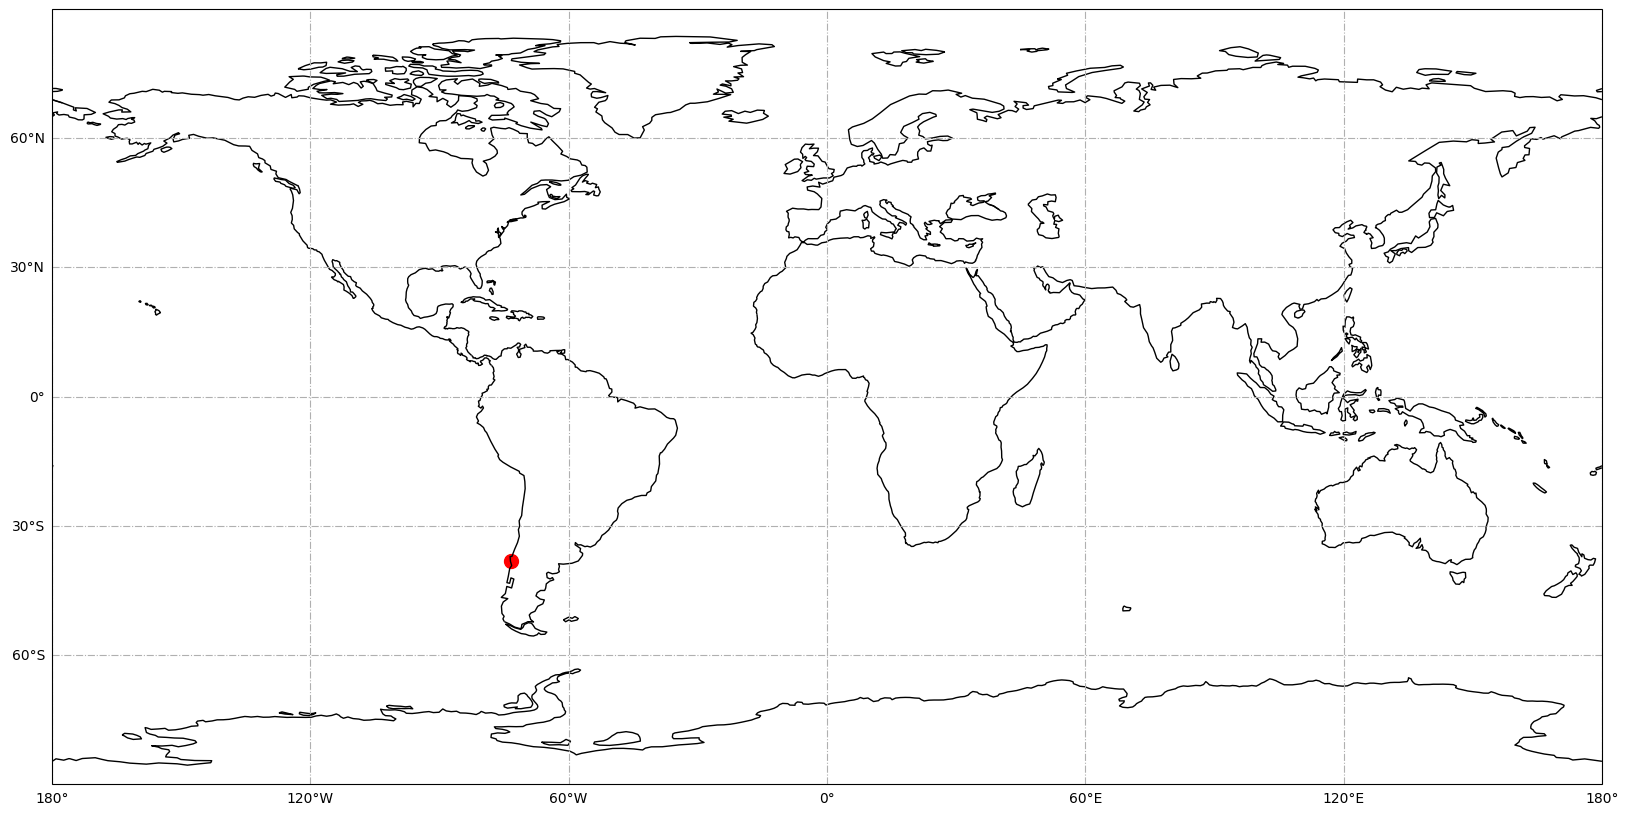

In [ ]:
plt.figure(figsize=(20, 20))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) #Trabajo en angulos
gl = ax.gridlines(linestyle='-.', draw_labels=True)  #agrego lineas, esta poseen el estilo "--"
gl.top_labels = False #Estas dos instrucciones las agrego para que en los lados arribas y derecha no posean la mismas leyendas de los angulos
gl.right_labels = False
ax.coastlines()
terromotoChile = ax.scatter(x=maximo['longitude'], y=maximo['latitude'], s=100, c='r')

En el caso que querramos observar el resto de los terremotos del dataset, podemos esperar que la mayoria se encuentren sobre el circulo de fuego del pacifico, que es la region donde mas actividad tectonica existe, por ende, actividad volcanica/sismica. formalmente podemos decir del circulo de fuego lo siguiente:

Informacion extraida de: https://es.wikipedia.org/wiki/Cinturón_de_fuego_del_Pacífico

El cinturón de fuego del Pacífico o anillo de fuego del Pacífico es una de las zonas de subducción ubicada en las costas del océano Pacífico caracterizada por ser algunas de las regiones sísmicas y volcánicas más importantes y activas del mundo.

Está conformada por la zona montañosa del oeste de Argentina, Chile, Perú, Ecuador, Colombia, Panamá, Costa Rica, Nicaragua, El Salvador, Honduras, Guatemala, México, Estados Unidos, Canadá, luego dobla a la altura de las islas Aleutianas y baja por las costas e islas de Rusia, Japón, Taiwán, Filipinas, Indonesia, Malasia, Timor Oriental, Brunéi, Singapur, Papúa Nueva Guinea, Islas Salomón, Tonga, Samoa, Tuvalu y Nueva Zelanda.

El lecho del océano Pacífico reposa sobre varias placas tectónicas que están en permanente fricción y por ende, acumulan tensión. Cuando esa tensión se libera, origina terremotos en los países del cinturón. Además, la zona concentra actividad volcánica constante. En esta zona las placas de la corteza terrestre se hunden a gran velocidad (varios centímetros por año) y a la vez acumulan enormes tensiones que deben liberarse en forma de sismos.


Erupción del Monte Santa Helena en 1980, una de las más violentas registradas

Efectos del maremoto originado tras el terremoto de Chile de 2010
El cinturón de fuego se extiende sobre 40 000 km (25 000 millas) y tiene la forma de una herradura. Incluye 452 volcanes y concentra más del 75 % de los volcanes activos e inactivos del mundo. Alrededor del 90 % de los terremotos del mundo y el 80 % de los terremotos más grandes del mundo se producen a lo largo del cinturón de fuego. La segunda región más sísmica (5-6 % de los terremotos y el 17 % de terremotos más grandes del mundo) es el cinturón alpino, el cual se extiende desde Java a Sumatra a través del Himalaya, el Mediterráneo hasta el Atlántico. El cinturón de la dorsal mesoatlántica es la tercera región más sísmica.

El cinturón de fuego del Pacífico también alberga la mayoría de los supervolcanes del planeta; erupciones históricas de estas magnitudes, que se conocen como erupciones VEI=8, han causado numerosos estragos a escalas globales e incluso extinciones masivas de especies.

El cinturón de fuego es el resultado directo de la tectónica de placas, el movimiento y la colisión de las placas de la corteza terrestre. La sección oriental del cinturón es el resultado de la subducción de la placa de Nazca y la placa de Cocos debajo de la placa Sudamericana que se desplaza hacia el oeste. La placa de Cocos se hunde debajo de la placa del Caribe en Centroamérica. Una porción de la placa del Pacífico, junto con la pequeña placa de Juan de Fuca se hunden debajo de la placa Norteamericana. A lo largo de la porción norte del cinturón, la placa del Pacífico, que se desplaza hacia el noroeste, está siendo subducida debajo del arco de las islas Aleutianas. Más hacia el oeste, la placa del Pacífico está subducida a lo largo de los arcos de la península de Kamchatka en el sur más allá de Japón. La parte sur es más compleja, con una serie de pequeñas placas tectónicas en colisión con la placa del Pacífico, desde las Islas Marianas, Filipinas, Bougainville, Tonga y Nueva Zelanda. Indonesia se encuentra entre el cinturón de fuego a lo largo de las islas adyacentes del noreste, incluyendo Nueva Guinea, y el cinturón Alpide a lo largo del sur y oeste de Sumatra, Java, Bali, Flores y Timor.

Los estudios indican que el cinturón de fuego del Pacífico se formó como consecuencia del movimiento de las placas tectónicas, las cuales se mueven como resultado de procesos internos del planeta.

Con este movimiento las placas tienden a chocar, y a veces ocurre que una se hunde debajo de otra, provocando en los bordes de dichas placas intensa actividad geológica. Por esta razón es comprensible que en los bordes del Pacífico se sitúen numerosos volcanes y se produzcan intensos terremotos.

Por lo general, los volcanes se forman en los límites de las placas tectónicas, aunque existen los llamados puntos calientes, donde no hay contacto entre placas, como es el caso de las islas Hawái. El cinturón de fuego del Pacífico concentra un 75 % de los volcanes activos del mundo, y en él se produce hasta el 90 % de los terremotos.

--------------------------------------------------------------------------------
Tal vez, para analizar a todos los terremotos, debamos dar algun mapa de color y asi ademas de los puntos del scatter, tener una tercera dimensionalidad de color


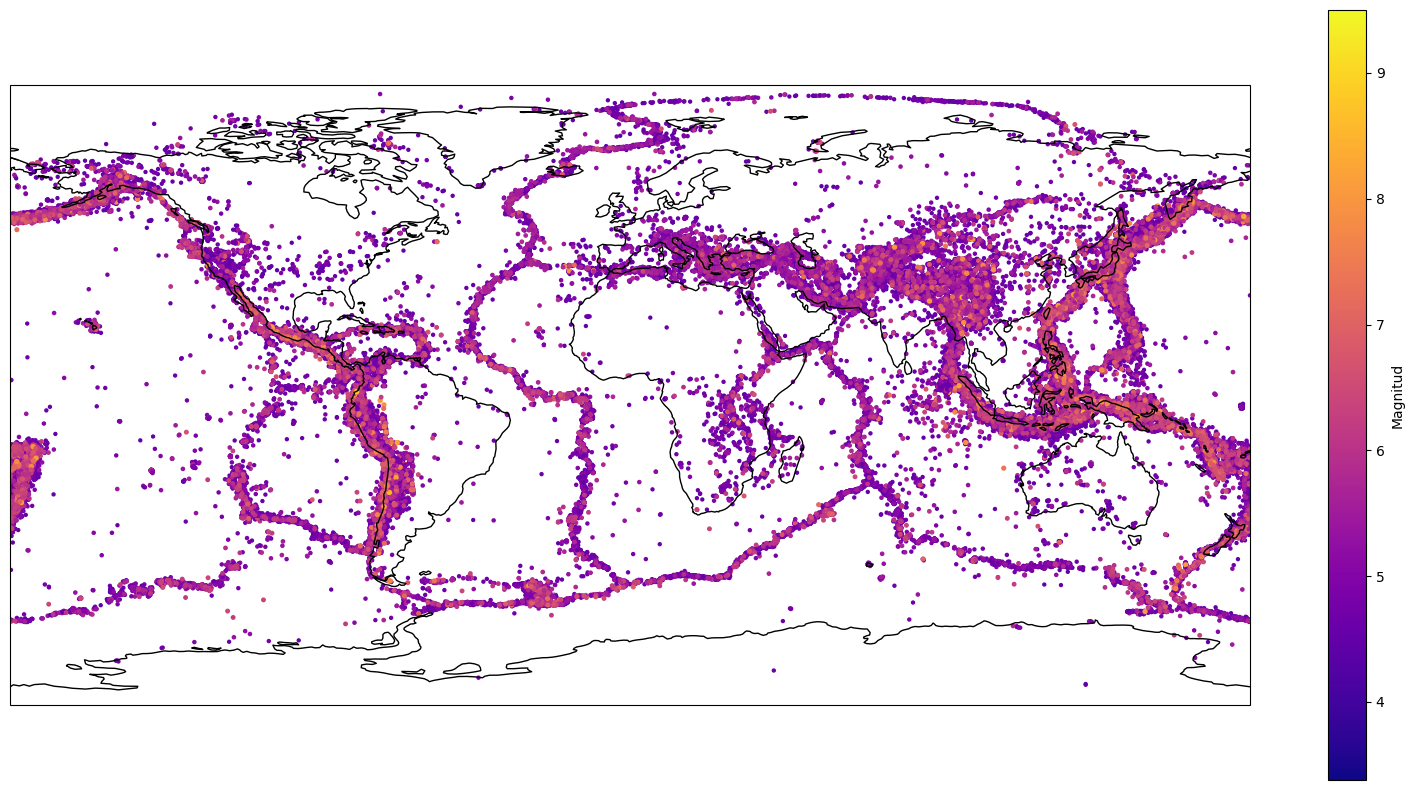

In [ ]:
plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree())
#La idea era identificar con violeta los de menor intensidad y con blanco los de mayor de 9, aunque para hacerlo mas efeciente decidimos utilizar entre la lista de matplotlib el cmap plasma, que mantiene un esquema similar
sc = ax.scatter(df_filtrado['longitude'], df_filtrado['latitude'], s=df_filtrado['mag'], c=df_filtrado['mag'], cmap='plasma', transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Magnitud')
ax.coastlines()

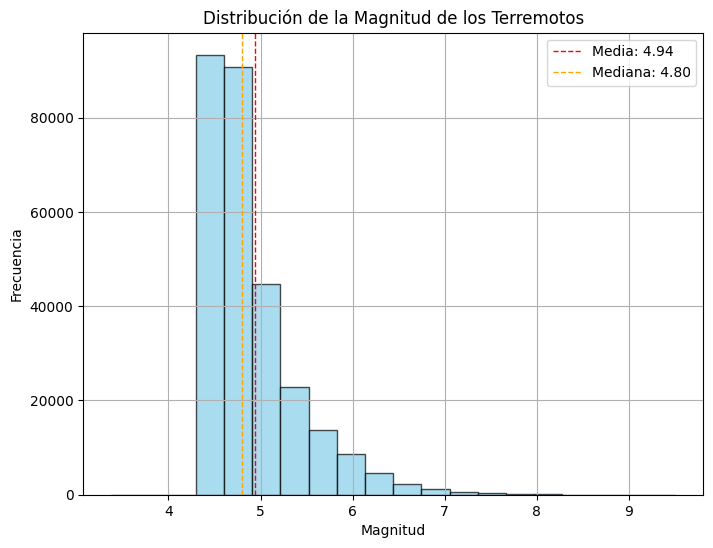

Media: 4.94
Mediana: 4.80
Desviación estándar: 0.49


In [ ]:
media = df_filtrado['mag'].mean()
mediana = df_filtrado['mag'].median()
std = df_filtrado['mag'].std()

plt.figure(figsize=(8, 6))
plt.hist(df_filtrado['mag'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Magnitud de los Terremotos')
plt.legend()
plt.grid(True)
plt.show()

#Para mas informacion que quede en consola los datos
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Desviación estándar: {std:.2f}")

Podemos intentar calcular la probabilidad de un evento

In [ ]:
terremotos_mayor_9 = df_filtrado[df_filtrado['mag'] > 9.0]
canNueve = len(terremotos_mayor_9)

print(f"la probabilidad de que un terremoto sea mayor a 9 es de {canNueve/filas}")

terremotos_mayor_6= df_filtrado[df_filtrado['mag'] > 6.0]
canseis = len(terremotos_mayor_6)
print(f"la probabilidad de que un terremoto sea mayor a 6 es de {canseis/filas}")
print(f"la probabilidad de que un terremoto sea menor a 6 es de {1-canseis/filas}")

la probabilidad de que un terremoto sea mayor a 9 es de 1.4127686026305752e-05
la probabilidad de que un terremoto sea mayor a 6 es de 0.04269033524998941
la probabilidad de que un terremoto sea menor a 6 es de 0.9573096647500106


Con lo analizado podemos observar que existe una muy baja probabilidad de que un evento sismico sea considerablemente peligroso. La mayoria se encuentran por debajo de 6. Tambien podemos ver, que los terremotos si bien tienen una distribucion a lo largo del globo, existe una tendencia muy marcada sobre el cinturon de fuego del pacifico. Analizando el grafico de puntos tampoco podemos afirmar que existe una tendencia a que los terremotos de mayor intensidad existan sobre alguna latitud o longitud especifica (siempre tomando como referencia las placas tectonicas)

--------------------------------------------------------------------------------
Haremos un pequeño web scraping a la usgs (misma que brindaba el dataset) para ver los utlimos terremotos que se han producido. Lo mas probable es que estos esten sobre el cinturon de fuego y con intensidad menores a 6

In [ ]:
import requests
import pandas as pd

url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson'

response = requests.get(url)

if response.status_code == 200: #es importante saber que nos dieron acceso, y que sino no preguntemos
    data = response.json()
    terremotos = []
    for feature in data['features']:
        terremoto = {
            'mag': feature['properties']['mag'],
            'Place': feature['properties']['place'],
            'Time': feature['properties']['time'],
            'latitude': feature['geometry']['coordinates'][1],  # Extraer la latitud
            'longitude': feature['geometry']['coordinates'][0]  # Extraer la longitud
        }
        terremotos.append(terremoto)
    df_terremoto = pd.DataFrame(terremotos)
    print(df_terremoto.head(10))
else:
    print('Error al hacer la solicitud a la API')

    mag                                     Place           Time   latitude  \
0  1.80  42 km SE of Denali National Park, Alaska  1708287114845  63.267200   
1  1.30                 28 km N of Paxson, Alaska  1708286193864  63.344800   
2  1.90              15 km ESE of Susitna, Alaska  1708285874046  61.497800   
3  1.09               10 km NW of The Geysers, CA  1708285114250  38.838165   
4  1.50                5 km SSW of Salcha, Alaska  1708284189189  64.484800   
5  1.30             54 km NW of Ninilchik, Alaska  1708284014433  60.406100   
6  1.58             17 km W of Searles Valley, CA  1708283666940  35.773667   
7  0.70                        6 km W of Cobb, CA  1708282581620  38.827168   
8  1.94                   12 km SE of Bodfish, CA  1708281752050  35.509000   
9  0.95             6 km NNE of Big Bear Lake, CA  1708281401330  34.295000   

    longitude  
0 -151.127600  
1 -145.512400  
2 -150.242000  
3 -122.833832  
4 -146.958200  
5 -152.343900  
6 -117.596333  
7 

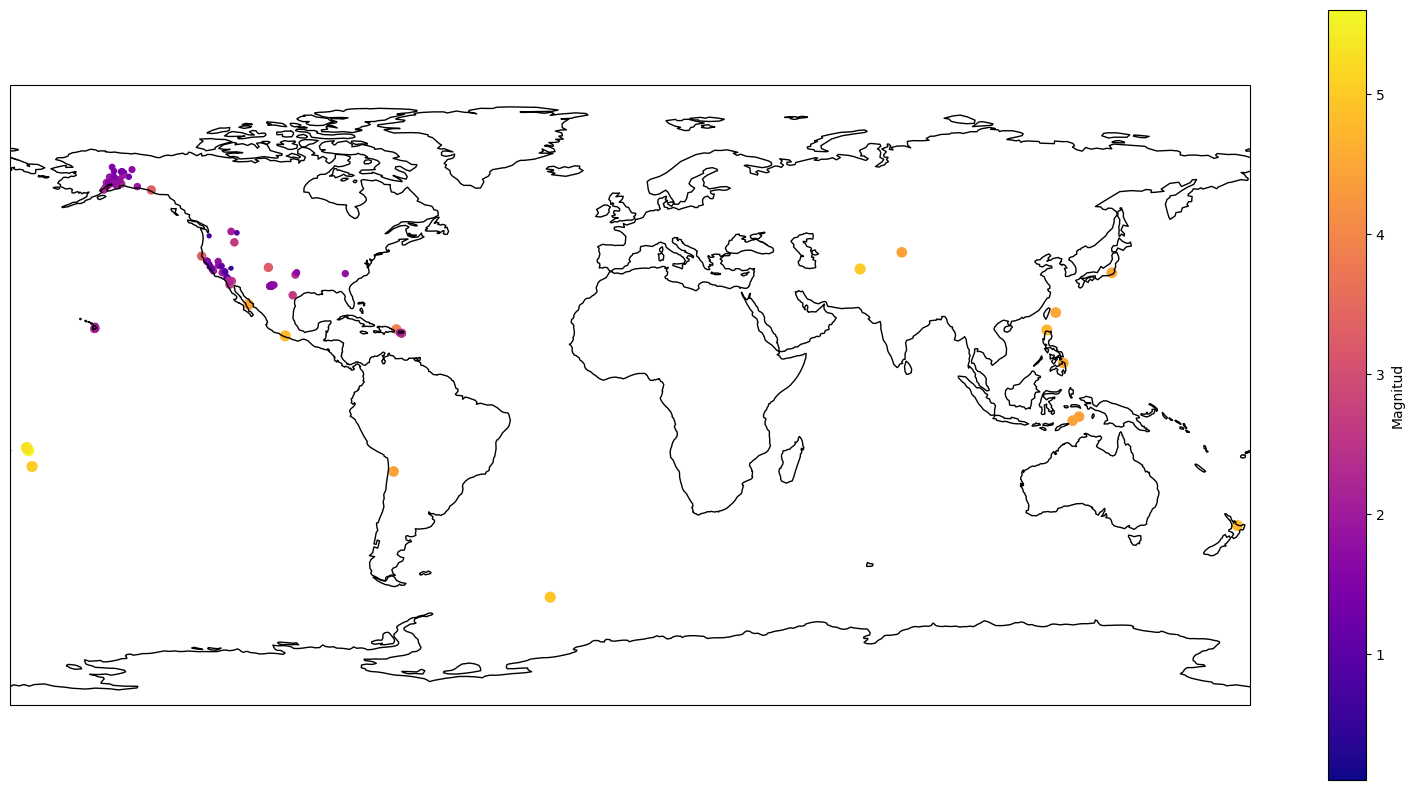

In [ ]:
plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree())
#La idea era identificar con violeta los de menor intensidad y con blanco los de mayor de 9, aunque para hacerlo mas efeciente decidimos utilizar entre la lista de matplotlib el cmap plasma, que mantiene un esquema similar
sc = ax.scatter(df_terremoto['longitude'], df_terremoto['latitude'], s=df_terremoto['mag']*10, c=df_terremoto['mag'], cmap='plasma', transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Magnitud')
ax.coastlines()

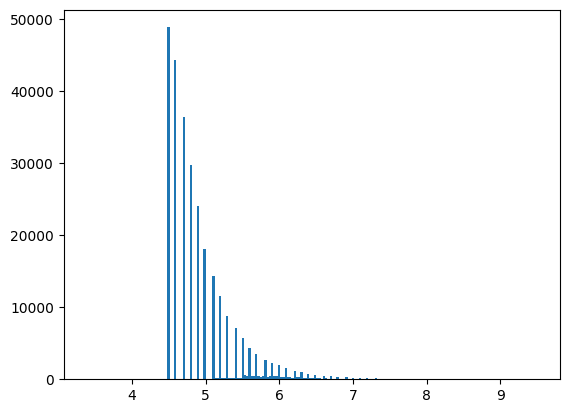

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.hist(df_terremoto.mag, bins=200)
plt.show()

In [ ]:
df_terremoto.mag.mean()

4.941264675133859

In [ ]:
df_terremoto.mag.median()

4.8

In [ ]:
df_terremoto.mag.max()

9.5

In [ ]:
df_terremoto.mag.min()

3.38

In [ ]:
df_terremoto.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,283132.000000,283132.000000,282540.000000,283132.000000,94296.000000,144360.000000,71103.000000,234815.000000,64013.000000,146269.000000,84886.000000,198002.000000
mean,4.381654,41.885638,69.795117,4.941265,82.707856,94.920725,4.518542,0.945888,8.403049,10.856471,0.137394,32.212872
std,29.459783,120.757518,115.794205,0.486020,96.171475,48.008934,5.793901,0.330535,4.902638,965.064825,0.112922,53.060711
min,-84.133000,-179.999700,-4.000000,3.380000,0.000000,6.500000,0.000000,-1.000000,0.014000,-1.000000,0.000000,0.000000
25%,-17.426025,-71.499000,10.000000,4.600000,25.000000,59.000000,1.308000,0.790000,6.200000,2.000000,0.068000,6.000000
50%,0.791000,99.178000,33.000000,4.800000,47.000000,89.000000,2.668000,0.940000,8.000000,5.700000,0.102000,15.000000
75%,29.909250,142.308000,60.792500,5.100000,100.000000,123.300000,5.243500,1.100000,10.170000,9.800000,0.173000,35.000000
max,87.386000,180.000000,700.900000,9.500000,934.000000,360.000000,62.626000,69.320000,99.000000,367558.100000,1.840000,941.000000


In [ ]:
df_terremoto.isna().sum()

time                    0
latitude                0
longitude               0
depth                 592
mag                     0
magType                 1
nst                188836
gap                138772
dmin               212029
rms                 48317
net                     0
id                      0
updated                 0
place                 847
type                    0
horizontalError    219119
depthError         136863
magError           198246
magNst              85130
status                  0
locationSource          0
magSource               0
dtype: int64

In [ ]:
df_terremoto.isna().sum() / df_terremoto.shape[0]

time               0.000000
latitude           0.000000
longitude          0.000000
depth              0.002091
mag                0.000000
magType            0.000004
nst                0.666954
gap                0.490132
dmin               0.748870
rms                0.170652
net                0.000000
id                 0.000000
updated            0.000000
place              0.002992
type               0.000000
horizontalError    0.773911
depthError         0.483389
magError           0.700189
magNst             0.300672
status             0.000000
locationSource     0.000000
magSource          0.000000
dtype: float64

In [ ]:
n_filas = df_terremoto.shape[0]
n_columnas = df_terremoto.shape[1]
print(f"num de filas: {n_filas}")
print(f"num de columnas: {n_columnas}")

num de filas: 283132
num de columnas: 22
